In [1]:
import tensorflow as tf
import keras
import numpy

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
x_train_full.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [4]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
class_names[y_train[0]]

'Coat'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [9]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7095 - accuracy: 0.7687 - val_loss: 0.5175 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4853 - accuracy: 0.8300 - val_loss: 0.4316 - val_accuracy: 0.8570
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4397 - accuracy: 0.8466 - val_loss: 0.4159 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4130 - accuracy: 0.8553 - val_loss: 0.3967 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.4261 - val_accuracy: 0.8488
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3782 - accuracy: 0.8665 - val_loss: 0.3725 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3652 - accuracy: 0.8717 - val_loss: 0.3583 - val_

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 70.4833 - accuracy: 0.8424


[70.4832534790039, 0.8424000144004822]

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

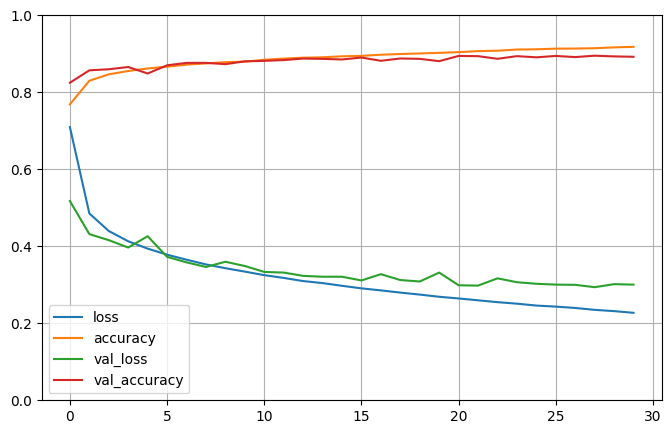

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.save("MLPfashino_mnist.keras")

In [24]:
model_loaded = keras.models.load_model("MLPfashino_mnist.keras")

In [27]:
x_new = x_test[:3]
y_proba = model_loaded.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 158ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
classes_x = numpy.argmax(y_proba,axis=1)
classes_x

array([9, 2, 1])

In [30]:
numpy.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

links para o keras
https://keras.io/activations/
https://keras.io/initializers/
https://keras.io/losses
https://keras.io/optimizers
https://keras.io/metrics